In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()
# Male = 1, Female =0

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


__`UNIVARIATE ANALYSIS`__

-> Histograms / KDE plots for continuous variables (age)

-> Countplots / barplots for categorical variables (anaemia)

In [8]:
continous_cols = ["age" , "creatinine_phosphokinase" , "ejection_fraction" , "platelets" , "serum_creatinine" , "serum_sodium" , "time"]
binary_cols = ["anaemia" , "diabetes" , "high_blood_pressure" , "sex" , "smoking"]

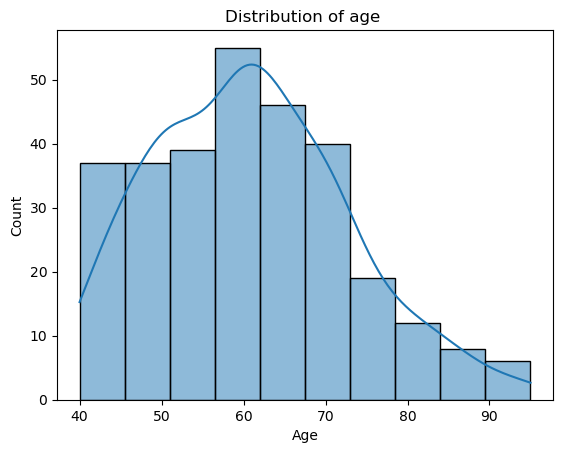

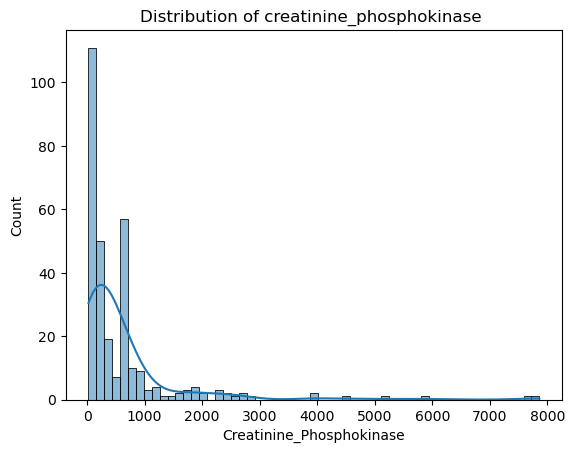

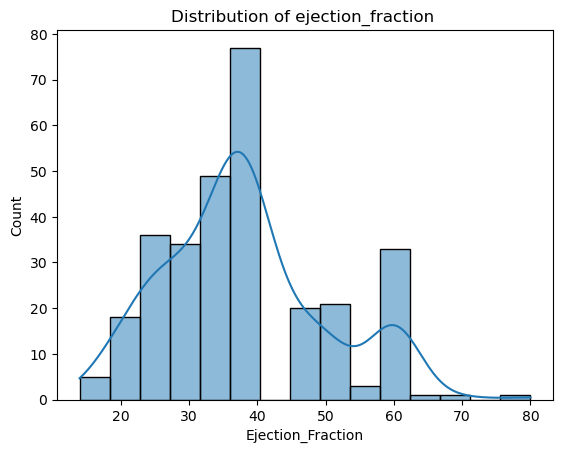

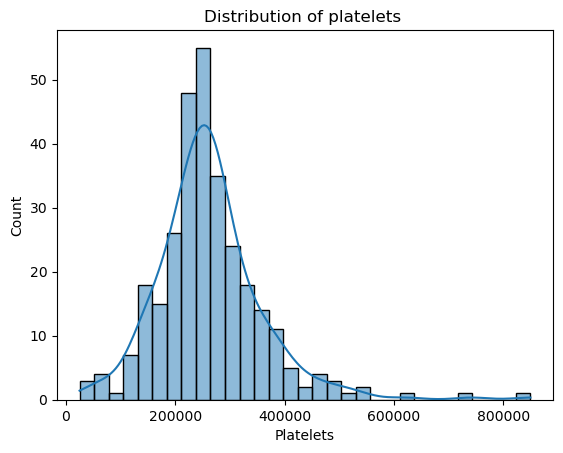

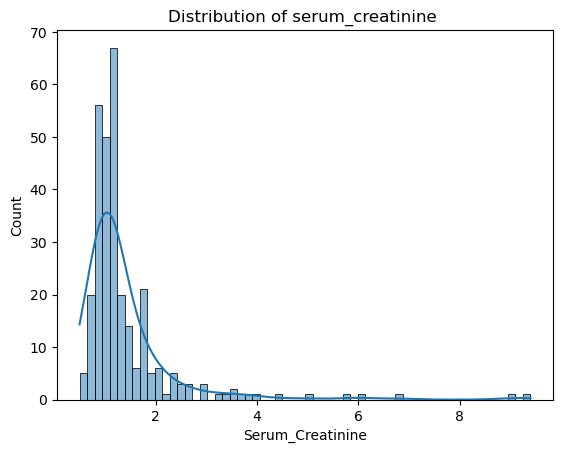

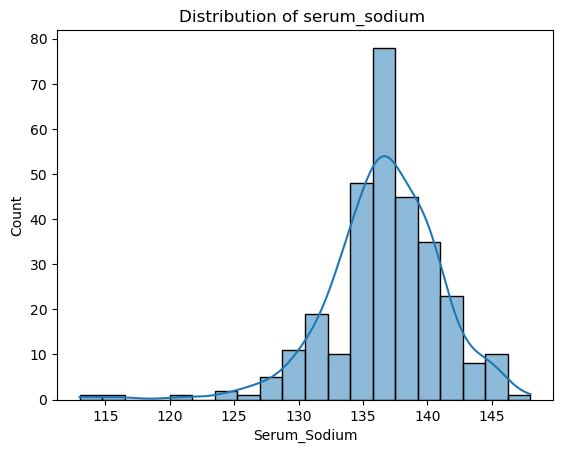

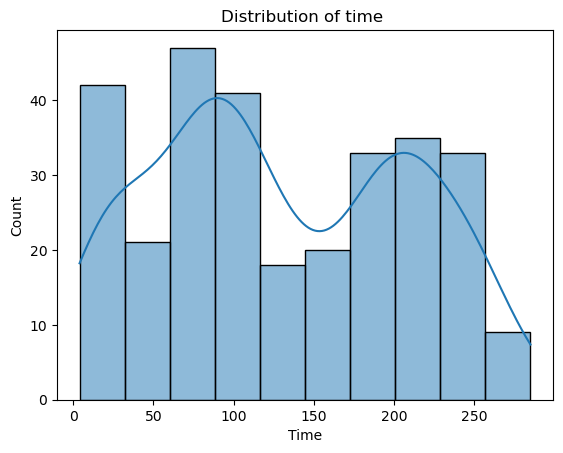

In [9]:
for i in continous_cols:
    sns.histplot(x = df[i] , kde = True ,)
    plt.xlabel(i.title())
    plt.title(f"Distribution of {i} ")
    plt.show()

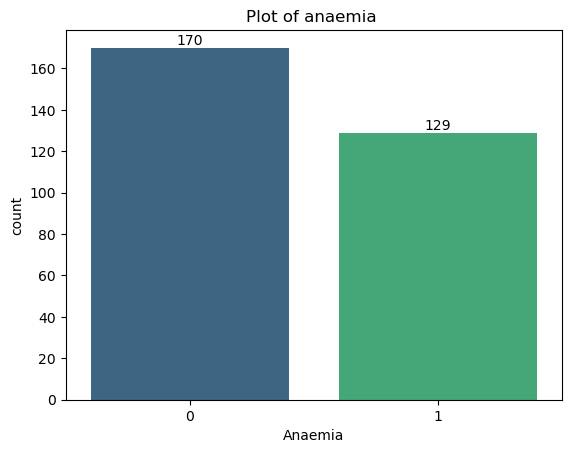

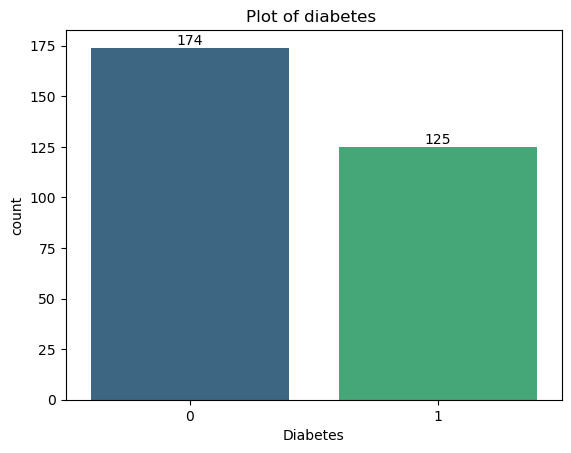

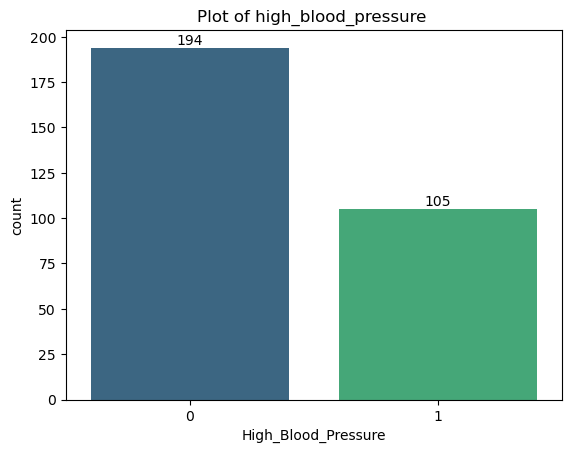

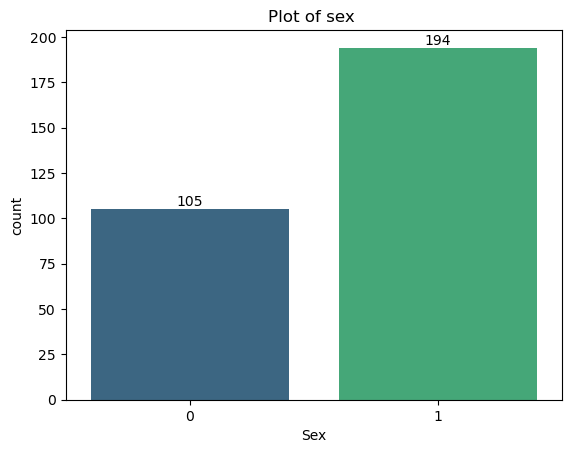

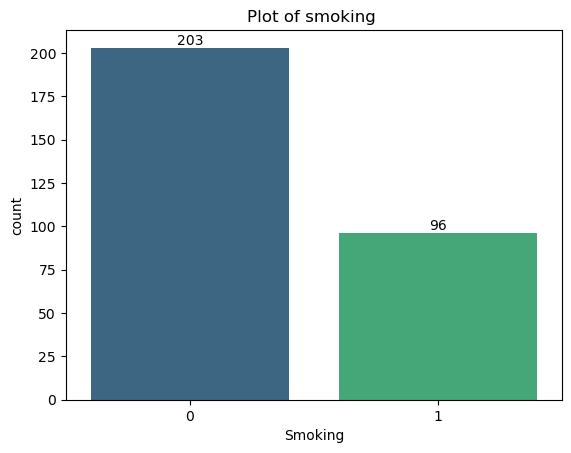

In [10]:
for i in binary_cols:
    ax = sns.countplot(x = df[i] , palette = "viridis" , )
    ax.bar_label(ax.containers[0])
    plt.xlabel(i.title())
    plt.title(f"Plot of {i} ")
    plt.show()

__`BIVARIATE ANALYSIS`__

-> Boxplots or violin plots or scatter plots for continous features vs target

-> Countplots for categorical features vs target

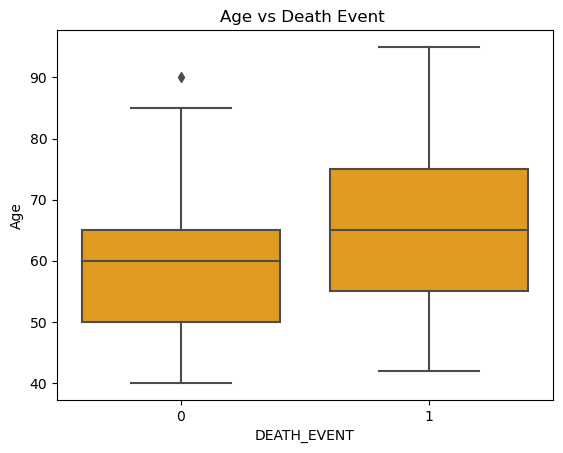

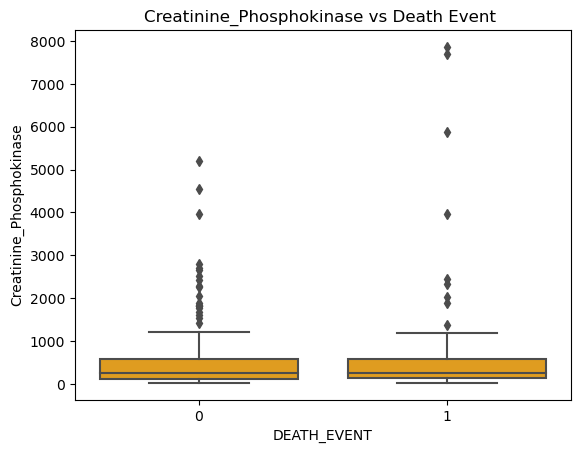

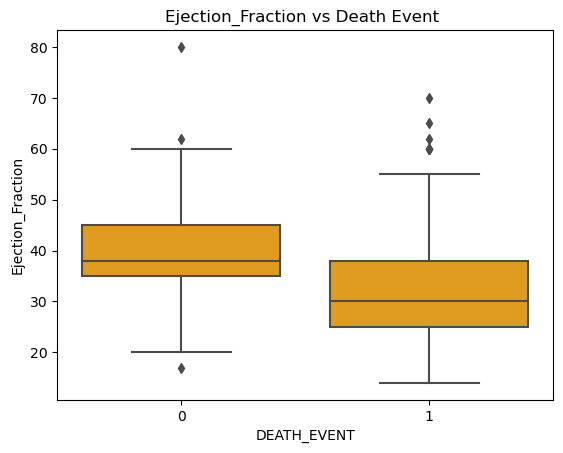

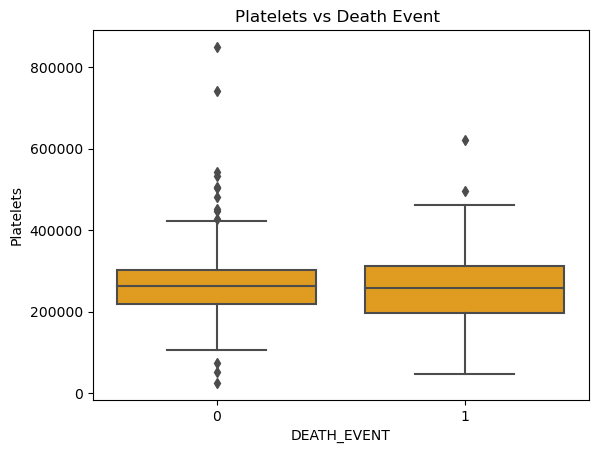

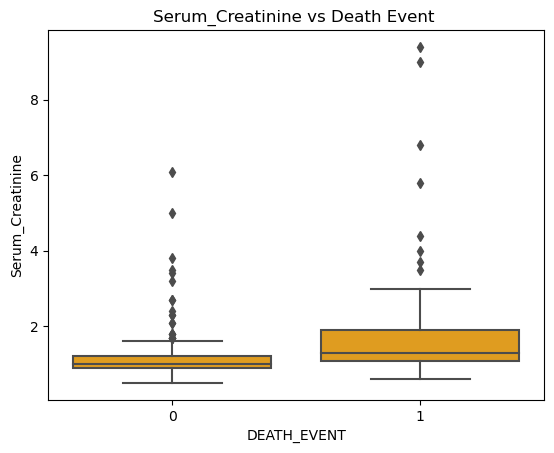

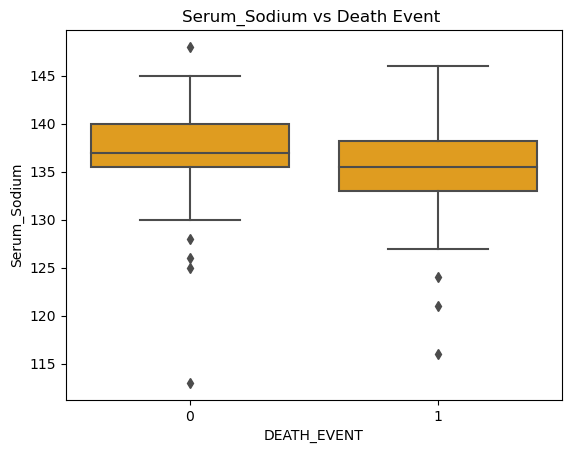

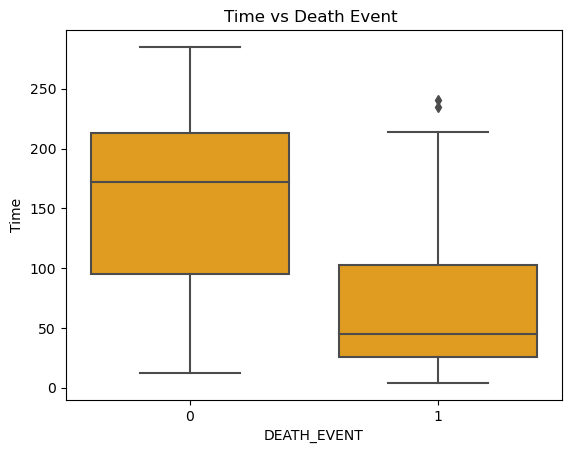

In [11]:
for i in continous_cols:
    sns.boxplot(x = df["DEATH_EVENT"] , y = df[i] , color = "orange")
    plt.xlabel("DEATH_EVENT")
    plt.ylabel(i.title())
    plt.title(f"{i.title()} vs Death Event ")
    plt.show()

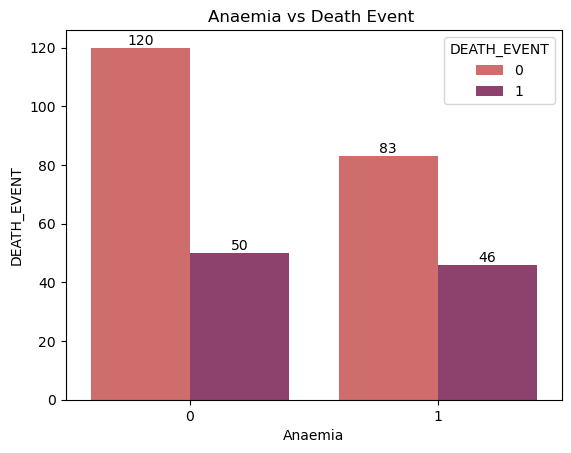

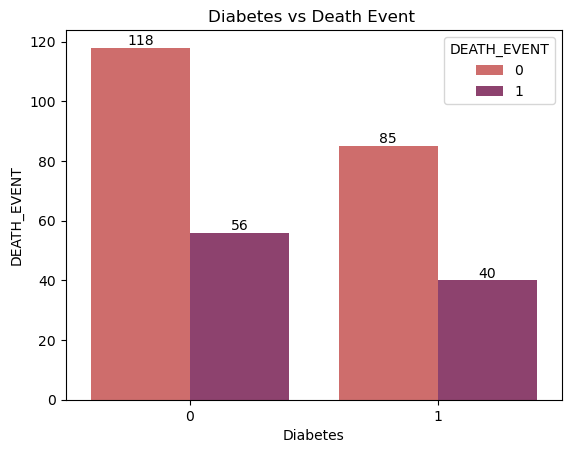

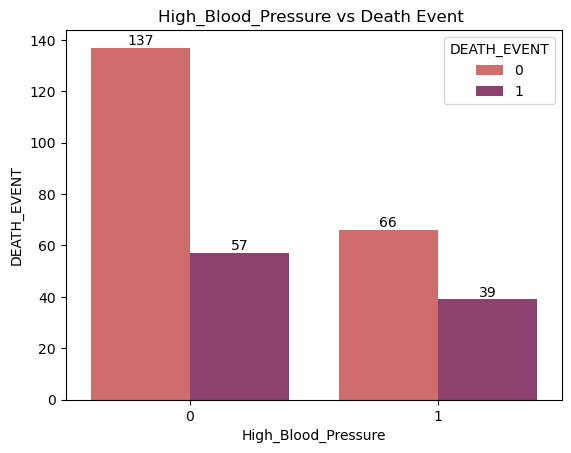

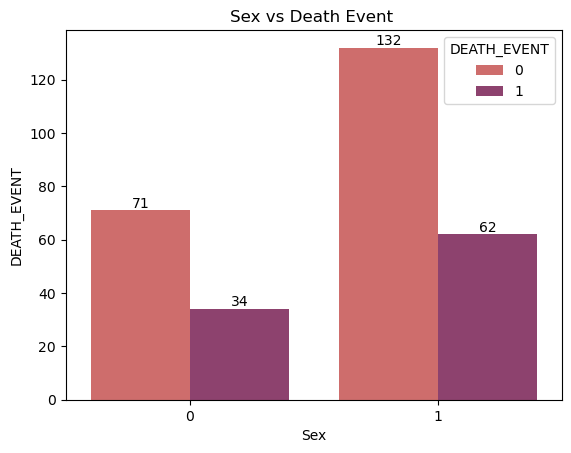

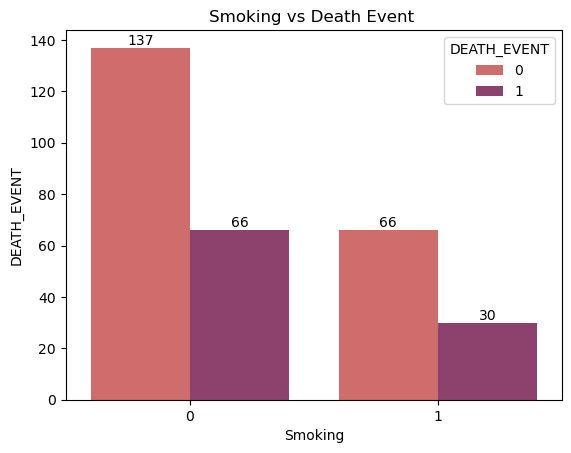

In [12]:
for i in binary_cols:
    ax = sns.countplot(x = df[i] , hue = df["DEATH_EVENT"] , palette = "flare")
    for container in ax.containers:
        ax.bar_label(container)
    plt.ylabel("DEATH_EVENT")
    plt.xlabel(i.title())
    plt.title(f"{i.title()} vs Death Event ")
    plt.show()

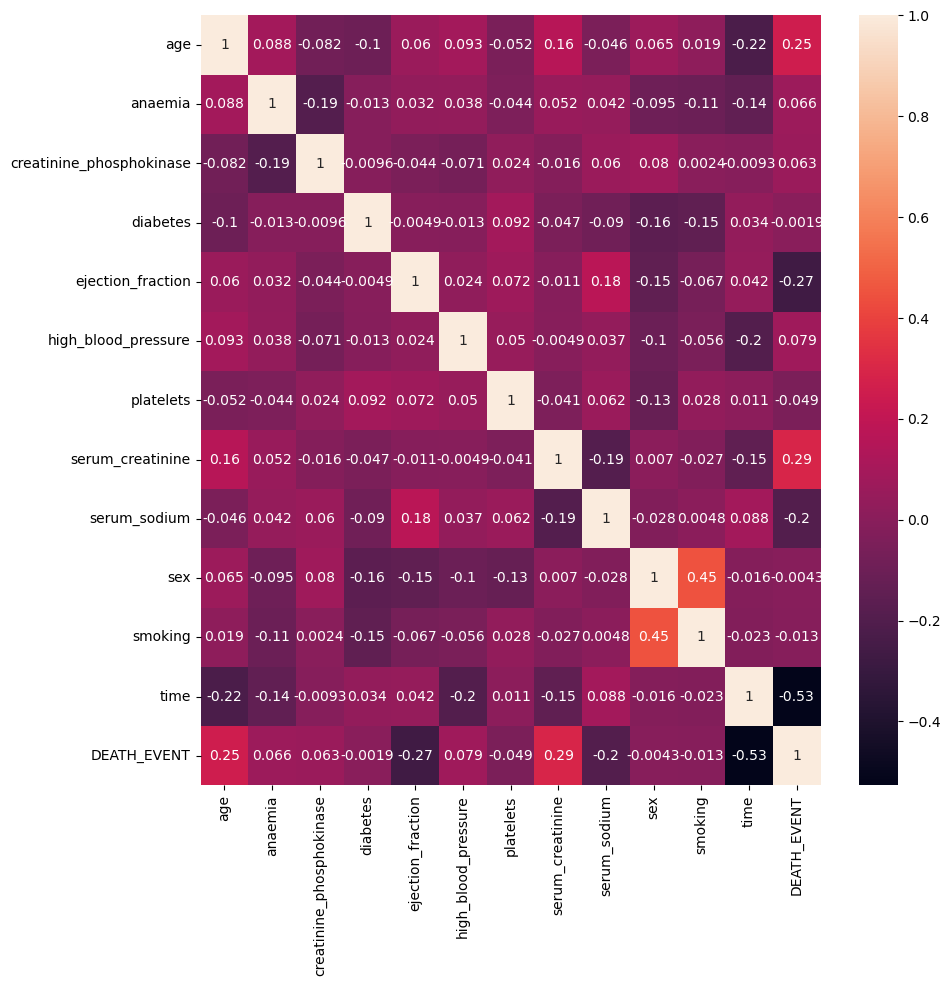

In [13]:
df_cor = df.corr()
plt.figure(figsize = (10 , 10))
sns.heatmap(data = df_cor , annot = True)
plt.show()

__`OUTLIER HANDLING`__

In [14]:
# Numeric columns only (ignore binary + target)
num_cols = ["age", "time", "ejection_fraction", "serum_creatinine",
            "serum_sodium", "platelets", "creatinine_phosphokinase"]

# Check skewness + histograms
for col in num_cols:
    print(f"📊 {col} | Skewness = {df[col].skew():.2f}")
   

📊 age | Skewness = 0.42
📊 time | Skewness = 0.13
📊 ejection_fraction | Skewness = 0.56
📊 serum_creatinine | Skewness = 4.46
📊 serum_sodium | Skewness = -1.05
📊 platelets | Skewness = 1.46
📊 creatinine_phosphokinase | Skewness = 4.46


In [15]:
from sklearn.preprocessing import StandardScaler , RobustScaler , FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [17]:
standard_scaler = ["age", "ejection_fraction", "serum_sodium", "time"]
robust_scaler = ["platelets"]
log_robust = ["serum_creatinine", "creatinine_phosphokinase"]

def log_transform_func(x):
    return np.log1p(x)

log_transform = FunctionTransformer(log_transform_func)

preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaling", StandardScaler(), standard_scaler),
        ("robust_scaling", RobustScaler(), robust_scaler),
        ("log_robust", Pipeline([
            ("log_transform", log_transform),
            ("robust", RobustScaler())
        ]), log_robust)
    ],
    remainder="passthrough"
)


X_scaled = preprocessor.fit_transform(X)

all_features = standard_scaler + robust_scaler + log_robust + [
    col for col in X.columns if col not in (standard_scaler + robust_scaler + log_robust)
]

scaled_df = pd.DataFrame(X_scaled, columns=all_features)



scaled_df

,age,ejection_fraction,serum_sodium,time,platelets,serum_creatinine,creatinine_phosphokinase,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,-1.530560,-1.504036,-1.629502,0.032967,1.381648,0.526107,0.0,0.0,1.0,1.0,0.0
1,-0.491279,-0.007077,-0.141976,-1.603691,0.014923,0.000000,2.150255,0.0,0.0,0.0,1.0,0.0
2,0.350833,-1.530560,-1.731046,-1.590785,-1.098901,0.389409,-0.334006,0.0,0.0,0.0,1.0,1.0
3,-0.912335,-1.530560,0.085034,-1.590785,-0.571429,1.381648,-0.503770,1.0,0.0,0.0,1.0,0.0
4,0.350833,-1.530560,-4.682176,-1.577879,0.714286,2.424484,-0.277213,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.007077,1.447094,1.803451,-1.175824,0.000000,-0.872950,0.0,1.0,1.0,1.0,1.0
295,-0.491279,-0.007077,0.539054,1.816357,0.087912,0.199131,1.237140,0.0,0.0,0.0,0.0,0.0
296,-1.333392,1.854958,0.312044,1.906697,5.274725,-0.659850,1.314430,0.0,1.0,0.0,0.0,0.0
297,-1.333392,-0.007077,0.766064,1.932509,-1.340659,0.571588,1.413126,0.0,0.0,0.0,1.0,1.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
df.shape


(299, 13)

In [20]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 , stratify = y)
#Stratify is crucial here because you want the ratio of deaths vs survivors to remain consistent in both sets.4

XGBoost (Pre-Tuning) ROC-AUC: 0.852


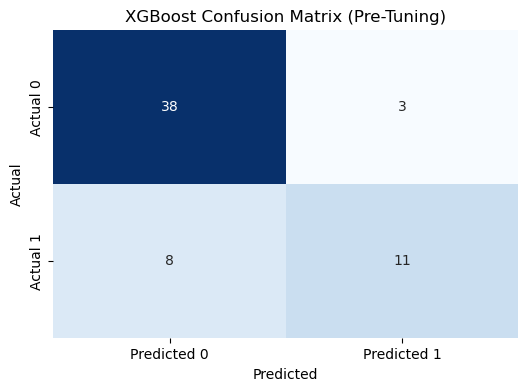

Classification report
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



In [22]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost model (default hyperparameters)
xgb_model_pre = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(eval_metric="logloss", random_state=42)),
])

xgb_model_pre.fit(X_train, y_train)

# Predictions
y_pred = xgb_model_pre.predict(X_test)
y_pred_prob = xgb_model_pre.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"XGBoost (Pre-Tuning) ROC-AUC: {roc_auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix (Pre-Tuning)")
plt.show()

# Classification Report
print("Classification report")
print(classification_report(y_test, y_pred))



__`Before Tuning`__

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Different models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("Preprocessor", preprocessor),
        ("Model", model)
    ])
    
    # Cross-validation with ROC-AUC (better for imbalanced data)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="roc_auc")
    results[name] = (np.mean(scores), np.std(scores))

import pandas as pd

df_results = pd.DataFrame(results, index=["Mean ROC-AUC", "Std Dev"]).T
df_results = df_results.round(3)
print(df_results.sort_values(ascending = False, by = "Mean ROC-AUC"))



                     Mean ROC-AUC  Std Dev
Logistic Regression         0.927    0.057
SVM                         0.870    0.050
Random Forest               0.838    0.066
XGBoost                     0.707    0.075


__`Tuning Random Forest Classifier`__

In [24]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_pipeline = Pipeline([
    ("Preprocessor", preprocessor),
    ("Model", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )),
])

param_dist = {
    "Model__n_estimators": [200, 300, 400, 500],
    "Model__max_depth": [15, 20, None],
    "Model__min_samples_split": [2, 5],
    "Model__min_samples_leaf": [1, 2, 4],
    "Model__max_features": ["sqrt", "log2", 0.5],
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search with StratifiedKFold
rf_random = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=stratified_cv,
    random_state=42,
    n_jobs=-1,
    verbose=2,
)

rf_random.fit(X, y)

results = pd.DataFrame(rf_random.cv_results_)
best_idx = rf_random.best_index_
mean_auc = results.loc[best_idx, "mean_test_score"]
std_auc = results.loc[best_idx, "std_test_score"]

print("Best Parameters:", rf_random.best_params_)
print("Best ROC-AUC (mean):", round(mean_auc, 3))
print("Standard Deviation:", round(std_auc , 3))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'Model__n_estimators': 300, 'Model__min_samples_split': 2, 'Model__min_samples_leaf': 4, 'Model__max_features': 'sqrt', 'Model__max_depth': None}
Best ROC-AUC (mean): 0.916
Standard Deviation: 0.015


__`Tuning XGBoost`__

In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import pandas as pd

param_grid_xgb = {
    "Model__n_estimators": [100, 200, 300],
    "Model__max_depth": [3, 5, 7],
    "Model__learning_rate": [0.1, 0.05, 0.01],
    "Model__subsample": [0.7, 1.0],
    "Model__colsample_bytree": [0.7, 1.0],
    "Model__min_child_weight": [1, 3, 5],
}

pipeline_xgb = Pipeline([
    ("Preprocessor", preprocessor),
    ("Model", XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )),
])

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch with StratifiedKFold
grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=stratified_cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2,
)

grid_search_xgb.fit(X, y)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best ROC-AUC:", grid_search_xgb.best_score_)

results = pd.DataFrame(grid_search_xgb.cv_results_)

best_idx = grid_search_xgb.best_index_

mean_auc = results.loc[best_idx, "mean_test_score"]
std_auc = results.loc[best_idx, "std_test_score"]

print("Best ROC-AUC (mean):", round(mean_auc, 3))
print("Standard Deviation:", round(std_auc, 3))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'Model__colsample_bytree': 0.7, 'Model__learning_rate': 0.01, 'Model__max_depth': 3, 'Model__min_child_weight': 5, 'Model__n_estimators': 100, 'Model__subsample': 0.7}
Best ROC-AUC: 0.9210526315789475
Best ROC-AUC (mean): 0.921
Standard Deviation: 0.022


__`Tuning Support Vector Classifier`__

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

# Pipeline
svm_pipeline = Pipeline([
    ("Preprocessor", preprocessor),
    ("Model", SVC(probability=True, random_state=42))
])

# Parameter distribution for RandomizedSearch
param_dist_svm = {
    "Model__C": [0.1, 1, 10, 100],
    "Model__kernel": ["linear", "rbf", "poly"],
    "Model__gamma": ["scale", "auto", 0.01, 0.1, 1],
    "Model__degree": [2, 3, 4]  # only used if kernel=poly
}

# Stratified CV
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
svm_random = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=param_dist_svm,
    n_iter=30,                 # number of random parameter sets to try
    scoring="roc_auc",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit
svm_random.fit(X, y)

# Results
results = pd.DataFrame(svm_random.cv_results_)
best_idx = svm_random.best_index_
mean_auc = results.loc[best_idx, "mean_test_score"]
std_auc = results.loc[best_idx, "std_test_score"]

print("Best Parameters:", svm_random.best_params_)
print("Best ROC-AUC (mean):", round(mean_auc ,3))
print("Standard Deviation:", round(std_auc , 3))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'Model__kernel': 'rbf', 'Model__gamma': 'scale', 'Model__degree': 3, 'Model__C': 0.1}
Best ROC-AUC (mean): 0.881
Standard Deviation: 0.05


__`Tuning Logistic Regression`__

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd

log_reg_pipeline = Pipeline([
    ("Preprocessor", preprocessor),
    ("Model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    )),
])

param_grid_log = {
    "Model__C": [0.01, 0.1, 1, 10],          # regularization strength
    "Model__penalty": ["l2"],                # L2 penalty (default)
    "Model__solver": ["lbfgs", "saga"],      # solvers compatible with L2
}

# Stratified CV
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_log = GridSearchCV(
    log_reg_pipeline,
    param_grid=param_grid_log,
    cv=stratified_cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

grid_search_log.fit(X, y)

results_log = pd.DataFrame(grid_search_log.cv_results_)
best_idx = grid_search_log.best_index_
mean_auc = results_log.loc[best_idx, "mean_test_score"]
std_auc = results_log.loc[best_idx, "std_test_score"]

print("Best Parameters:", grid_search_log.best_params_)
print("Best ROC-AUC (mean):", round(mean_auc, 3))
print("Standard Deviation:", round(std_auc, 3))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Parameters: {'Model__C': 0.01, 'Model__penalty': 'l2', 'Model__solver': 'saga'}
Best ROC-AUC (mean): 0.888
Standard Deviation: 0.04


__`After Tuning`__

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd

# models with tuned hyperparameters
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        C=0.01,
        penalty="l2",
        solver="saga",
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features="sqrt",
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.7,
        colsample_bytree=0.7,
        min_child_weight=5,
        eval_metric="logloss",
        random_state=42
    ),
    "SVM": SVC(
        C=0.1,
        kernel="rbf",
        gamma="scale",
        degree=3,
        probability=True,
        class_weight="balanced",
        random_state=42
    ),
}

# Stratified CV for fair evaluation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("Preprocessor", preprocessor),
        ("Model", model),
    ])

    # Cross-validation with StratifiedKFold
    scores = cross_val_score(pipeline, X, y, cv=stratified_cv, scoring="roc_auc")
    results[name] = (np.mean(scores), np.std(scores))

df_results = pd.DataFrame(results, index=["Mean ROC-AUC", "Std Dev"]).T
df_results = df_results.round(3)

df_results = df_results.sort_values(ascending=False, by="Mean ROC-AUC")
print(df_results)



                     Mean ROC-AUC  Std Dev
XGBoost                     0.921    0.021
Random Forest               0.914    0.019
Logistic Regression         0.888    0.040
SVM                         0.882    0.050


__`XGBoost is the best suited model as it has the highest mean roc-auc score and even though Random Forest is slightly more stable(0.02) this stability is negligible , so my final model is XGBoost`__

In [29]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.7,
        colsample_bytree=0.7,
        min_child_weight=5,
        eval_metric="logloss",
        random_state=42
    ))
])

clf.fit(X, y)

joblib.dump(clf, "xgboost_pipeline.pkl")

['xgboost_pipeline.pkl']